In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from loguru import logger
from sklearn.model_selection import train_test_split

In [2]:
images = np.load('./mds-misis-dl-captchan/images.npy')
labels = np.load('./mds-misis-dl-captchan/labels.npy')

In [3]:
images_sub = np.load('./mds-misis-dl-captchan/images_sub.npy')

### Разделим данные на обучающую и тестовую выборки

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

### Посмотрим на данные

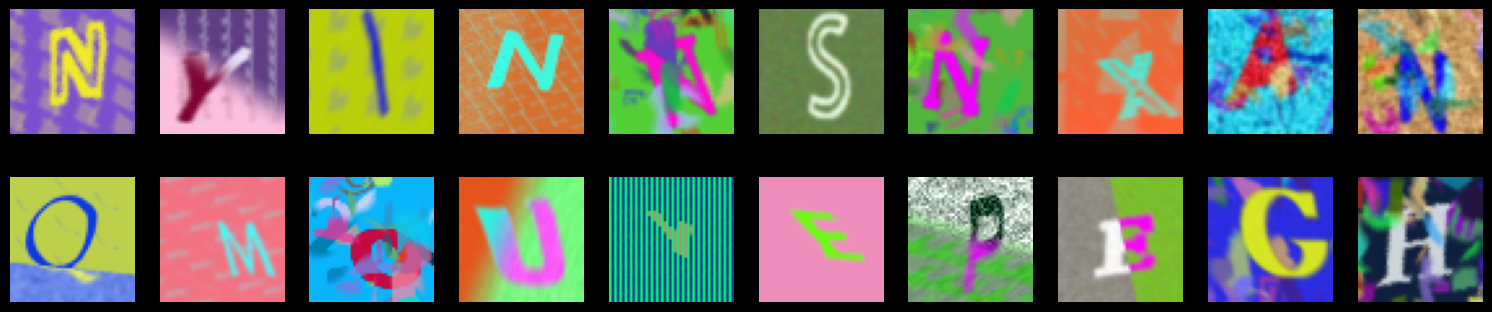

In [5]:
class ImgFigSettings:
    cols = 10
    rows = 2
    facecolor = "black"

    @classmethod
    def get_fig_size(cls) -> tuple[float, float]:
        return 2 * cls.cols - 1, 2.5 * cls.rows - 1


fig = plt.figure(figsize=ImgFigSettings.get_fig_size(), facecolor=ImgFigSettings.facecolor)
for idx in range(ImgFigSettings.cols * ImgFigSettings.rows):
    fig.add_subplot(ImgFigSettings.rows, ImgFigSettings.cols, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')

plt.show()

### Нормализуем данные

In [6]:
class NormSettings:
    norm_value = 255
    shift_value = 0.5
    
    number_letters = 27


x_train_norm = X_train.astype('float32') / NormSettings.norm_value - NormSettings.shift_value
x_test_norm = X_test.astype('float32') / NormSettings.norm_value - NormSettings.shift_value
images_sub_norm = images_sub.astype('float32') / NormSettings.norm_value - NormSettings.shift_value

y_train_cat = keras.utils.to_categorical(y_train, NormSettings.number_letters - 1)
y_test_cat = keras.utils.to_categorical(y_test, NormSettings.number_letters - 1)

In [7]:
model_layers = [
    layers.Input(shape=(48,48,3)),
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, padding='same'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(26, activation='softmax'),
]

model = keras.Sequential(model_layers)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,80

 Total params: 1,896,698 (7.24 MB)

 Trainable params: 1,895,930 (7.23 MB)

 Non-trainable params: 768 (3.00 KB)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train_norm, y_train_cat, batch_size=128, epochs=11, validation_data=(x_test_norm, y_test_cat))

Epoch 1/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 283ms/step - accuracy: 0.0463 - loss: 3.4642 - val_accuracy: 0.0440 - val_loss: 3.2567
Epoch 2/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 288ms/step - accuracy: 0.0691 - loss: 3.1733 - val_accuracy: 0.0438 - val_loss: 3.4581
Epoch 3/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 291ms/step - accuracy: 0.2461 - loss: 2.5085 - val_accuracy: 0.2520 - val_loss: 2.5282
Epoch 4/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 294ms/step - accuracy: 0.5151 - loss: 1.5485 - val_accuracy: 0.5706 - val_loss: 1.4398
Epoch 5/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 296ms/step - accuracy: 0.6505 - loss: 1.1017 - val_accuracy: 0.6886 - val_loss: 0.9846
Epoch 6/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 296ms/step - accuracy: 0.7275 - loss: 0.8483 - val_accuracy: 0.7754 - val_loss: 0.7131
Epoch 7/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 294ms/step - accuracy: 0.7712 - loss: 0.7063 - val_accuracy: 0.8018 - val_loss: 0.6292
Epoch 8/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 295ms/step - accuracy: 0.7977 - loss: 0

In [12]:
_, accuracy, *_ = model.evaluate(x_test_norm, y_test_cat, verbose=0)

In [13]:
if accuracy > 0.82:
    logger.success(f"Точность модели: {accuracy}")
    
    y_response = model.predict(images_sub_norm)
    
    logger.info("Начинаем сохранять результаты в файл")
    result = pd.DataFrame(np.argmax(y_response, axis=1), columns=["Category"])
    result["Id"] = result.index

    result.to_csv("result_submission.csv", index=False)
    logger.success("Результаты сохранены в файл")
else:
    logger.warning(f"Точность модели: {accuracy}. Нужно исправить модель 🥹")

2024-05-20 01:34:18.214 | SUCCESS  | __main__:<module>:2 - Точность модели: 0.8650000095367432


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step


2024-05-20 01:34:57.642 | INFO     | __main__:<module>:6 - Начинаем сохранять результаты в файл
2024-05-20 01:34:57.669 | SUCCESS  | __main__:<module>:11 - Результаты сохранены в файл


In [10]:
model.predict(images_sub_norm)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step


array([[2.1073140e-05, 1.4027809e-03, 2.4459145e-05, ..., 9.5007638e-04,
        2.3437690e-02, 7.0698082e-04],
       [4.0092105e-03, 3.0356430e-05, 3.1306862e-03, ..., 2.7546493e-02,
        2.6972212e-02, 3.9846571e-03],
       [7.3361723e-04, 2.0279890e-02, 1.2402207e-03, ..., 1.0445711e-09,
        6.9676474e-08, 5.1033949e-06],
       ...,
       [4.2448580e-08, 1.3814223e-06, 1.1323034e-05, ..., 2.3189939e-17,
        8.6016047e-14, 7.1313420e-12],
       [3.6518779e-04, 3.6564261e-01, 3.1177552e-02, ..., 1.3793434e-08,
        1.6917751e-07, 5.4760851e-05],
       [1.0424157e-03, 6.0720590e-04, 1.0174373e-03, ..., 6.0854387e-04,
        1.0822892e-02, 6.3534492e-01]], dtype=float32)

In [ ]:
images_sub